In [143]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import time
import warnings
import xgboost as xgb
import seaborn as sns

#from fastai.imports import *
#from fastai.structured import *
from fbprophet import Prophet

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import KFold
from scipy import stats
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go
import plotly_express as px

import statsmodels.api as sm
# Initialize plotly
init_notebook_mode(connected=True)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

pd.option_context("display.max_rows", 1000);
pd.option_context("display.max_columns", 1000);

In [72]:
df_train = pd.read_csv('dataset/train.csv', parse_dates=['date'], index_col=['date'])
df_test = pd.read_csv('dataset/test.csv', parse_dates=['date'], index_col=['date'])
subs = pd.read_csv('dataset/sample_submission.csv')


## Dataset view

In [73]:
profile = pandas_profiling.ProfileReport(df_train)
profile

Number of variables,4
Number of observations,913000
Total Missing (%),0.0%
Total size in memory,27.9 MiB
Average record size in memory,32.0 B
Numeric,3
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


### Per Product Sales (daily)

In [176]:
def product_sale_ts(product_id1, product_id2):
    
    """Plotting per product sales time series at daily interval"""
    
    df_red = df_train[df_train['item'].isin([product_id1,product_id2])]
    df_red = df_red.reset_index()
    df_red = df_red.sort_values(by = ['date', 'item'])
    fig = px.line(df_red, x='date', y='sales', facet_row = 'item', title='product-sale vs time(daily)')
    return fig

product_sale_ts(product_id1=1, product_id2=2)


### Per Shop Sales (weekly)

In [133]:
def store_sales_ts(store_id1, store_id2):
    
    """Weekly sale value per store or category"""
    
    df_train['sales'] = df_train['sales'].astype(float)
    sales_a = df_train[df_train['store'] == store_id1]['sales'].sort_index(ascending = True)
    sales_a = sales_a.resample('W').sum()
    sales_b = df_train[df_train['store'] == store_id2]['sales'].sort_index(ascending = True) # solve the reverse order
    sales_b = sales_b.resample('W').sum()
    fig1 = px.line(sales_a.reset_index(), x='date', y='sales', title='weekly sale value per store/cat')
    fig2 = px.line(sales_b.reset_index(), x='date', y='sales', title='weekly sale value per store/cat')

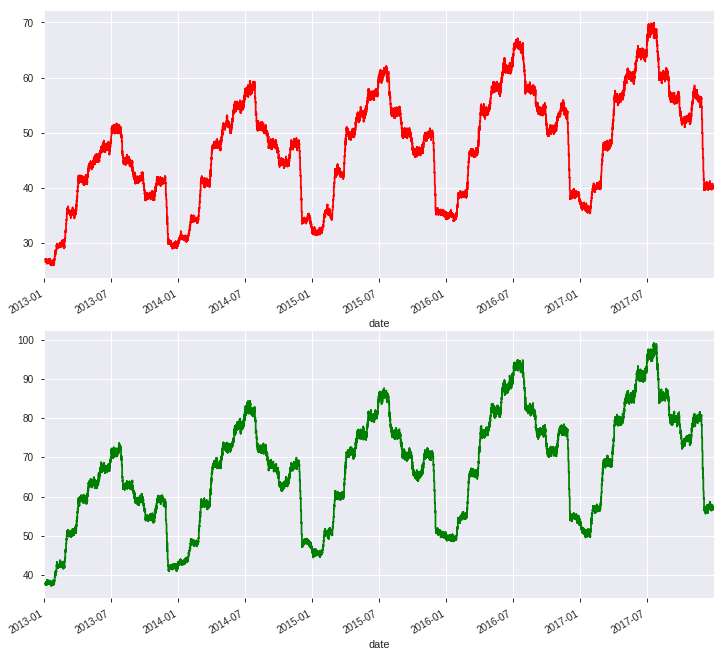

In [159]:
f, (ax1, ax2) = plt.subplots(2, figsize = (12, 12))
sales_a = df_train[df_train['store'] == 1]['sales'].sort_index(ascending = True)
sales_b = df_train[df_train['store'] == 2]['sales'].sort_index(ascending = True) # solve the reverse order

# Yearly
decomposition_a = sm.tsa.seasonal_decompose(sales_a, model = 'multiplicative', freq=365)
decomposition_a.trend.plot(color = 'red', ax = ax1)
#px.line(decomposition_a.trend, x=)

decomposition_b = sm.tsa.seasonal_decompose(sales_b, model = 'multiplicative', freq=365)
decomposition_b.trend.plot(color = 'green', ax = ax2)


In [155]:
df_train['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])